# Report of the scenario

The next libraries are used to generate this report.

In [1]:
import pyam
import matplotlib.pyplot as plt
import plotly
import triesearching

Selection of results:
1. Customize the path where the file with results is placed (by default: "..\\Conversion-Script\\File_Converted\\").
2. Define the name of the file.
3. Define the name of the model and scenario to analyse

In [134]:
# 1. path to the results file (in IAMC format)
path = "..\\Conversion-Script\\File_Converted\\"

# Structure to check the existance of the file
try:
    df = pyam.IamDataFrame(path + "Baseline no policies no CO2taxconverted.csv") # 2. It imports the data from an existing file (IAMC formatted)
except:
    print("ERROR opening the file with results in IAMC format")

# 3. This defines the model and scenario used for the report
args = dict(model="WILIAM", scenario="Baseline no policies no CO2tax")


[INFO] 20:33:43 - pyam.core: Reading file ..\Conversion-Script\File_Converted\Baseline no policies no CO2taxconverted.csv
c:\Users\34670\.conda\envs\wiliamcformat\Lib\site-packages\pyam\utils.py:318: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  .stack(dropna=True)


The next sections defines principal results of each module.

## Demography (35 regions)

* **Total population**: The World population aggregates living people per sex, region, and age cohort. 

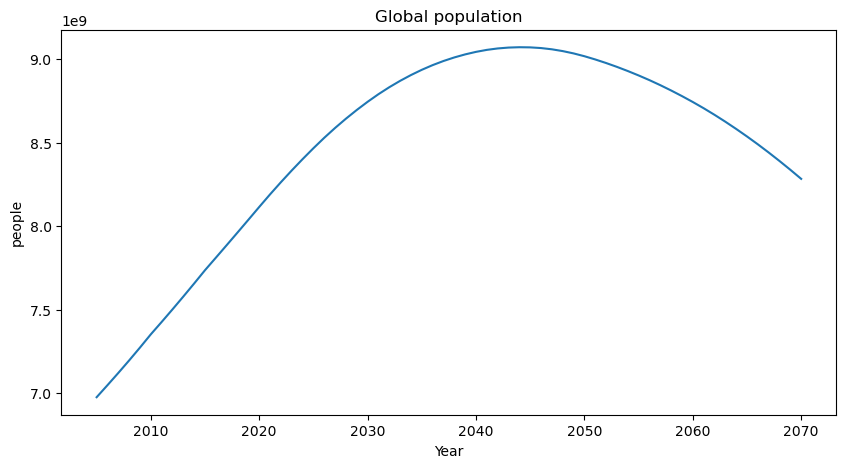

In [135]:
# Aggregate all the regional populations
#data = df.aggregate_region("Population").timeseries()

datagg = df.aggregate_region("Population").timeseries()

# "aggregate_region" function generates a DataFrame object instead of IamDataFrame object. We plot results with DataFrame functions
dataggtrans = datagg.transpose()

# Generate the plot. To customize this plot, go to: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html
plot = dataggtrans.plot(kind='line',
                        title="Global population",
                        legend=False,
                        ylabel="people",
                        xlabel="Year",
                        figsize=[10,5])



## Energy (9 regions)

* **Consumption of primary energy per region in 2050** 

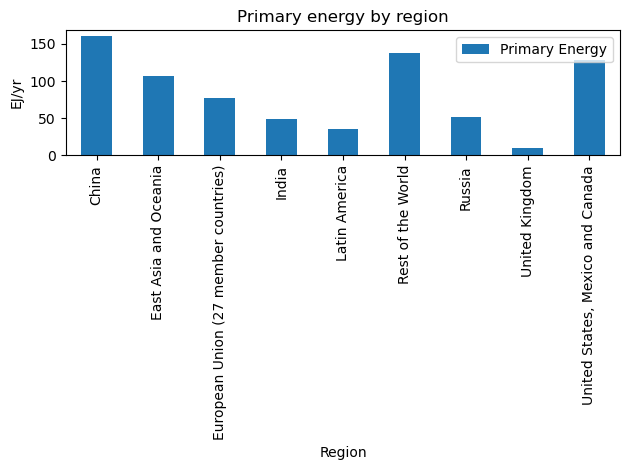

In [140]:
data = df.filter(**args, variable="Primary Energy", year=2050)

data.plot.bar(title="Primary energy by region", x="region")
plt.legend(loc=1)
plt.tight_layout()
plt.show()

* **Sankey diagram of part of the Chinese energy system in 2050** 

In [154]:
sankey_mapping = {
    "Primary Energy|Agriculture Products": ("Agriculture", "Solids"),
    "Primary Energy|Coal": ("Fossil", "Solids"),
    "Primary Energy|Forestry Products": ("Forestry", "Solids"),
    "Primary Energy|Geothermal": ("Geothermal", "Geothermal plants"),
    "Primary Energy|Hydropower": ("Hydropower dams", "Hydro"),
    "Primary Energy|Natural Gas": ("Fossil", "Gas fuels"),
    "Primary Energy|Nuclear": ("Uranium", "Nuclear"),
    "Primary Energy|Ocean": ("Sea", "Ocean"),
    "Primary Energy|Oil": ("Fossil", "Liquids"),
    "Primary Energy|Solar": ("Sun", "Solar"),
    "Primary Energy|Waste": ("Cities", "Waste"),
    "Primary Energy|Wind": ("Wind", "Wind plants"),

    "Secondary Energy|Electricity|Gas Fuels|w/ CCS": ("Gas fuels", "Power Grid"),
    "Secondary Energy|Electricity|Gas Fuels|w/o CCS": ("Gases wothout CCS", "Power Grid"),
    "Secondary Energy|Electricity|Geothermal": ("Geothermal", "Power Grid"),
    "Secondary Energy|Electricity|Hydro|Dammed": ("Hydro", "Power Grid"),
    "Secondary Energy|Electricity|Hydro|Run Of River": ("Hydro", "Power Grid"),
    "Secondary Energy|Electricity|Liquid Fuels|w/ CCS": ("Liquids", "Power Grid"),
    "Secondary Energy|Electricity|Liquid Fuels|w/o CCS": ("Liquids", "Power Grid"),
    "Secondary Energy|Electricity|Nuclear": ("Nuclear", "Power Grid"),
    "Secondary Energy|Electricity|Ocean": ("Ocean", "Power Grid"),
    "Secondary Energy|Electricity|Solar|CSP": ("Solar", "Power Grid"),
    "Secondary Energy|Electricity|Solar|Open Space|PV": ("Solar", "Power Grid"),
    "Secondary Energy|Electricity|Solar|Urban|PV": ("Solar", "Power Grid"),
    "Secondary Energy|Electricity|Solid|Biomass|w/ CCS": ("Solids", "Power Grid"),
    "Secondary Energy|Electricity|Solid|Biomass|w/o CCS": ("Solids", "Power Grid"),
    "Secondary Energy|Electricity|Solid|Fossil|w/ CCS": ("Solids", "Power Grid"),
    "Secondary Energy|Electricity|Solid|Fossil|w/o CCS": ("Solids", "Power Grid"),
    "Secondary Energy|Electricity|Waste|w/ CCS": ("Waste", "Power Grid"),
    "Secondary Energy|Electricity|Waste|w/o CCS": ("Waste", "Power Grid"),
    "Secondary Energy|Electricity|Wind|Offshore": ("Wind", "Power Grid"),
    "Secondary Energy|Electricity|Wind|Onshore": ("Wind", "Power Grid")
}


data = df.filter(**args,region="China", year=2050, unit="EJ/yr").plot.sankey(mapping=sankey_mapping)
# calling `show()` is necessary to have the thumbnail in the gallery overview
plotly.io.show(data)

c:\Users\34670\.conda\envs\wiliamcformat\Lib\site-packages\pyam\figures.py:58: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [141]:
# Import the library to efficiently search variables
import triesearching

# Creation of the trie (tree data structure) of our results
trie = triesearching.Trie()

for x in df.variable:
    trie.insert(x)

prefix = input("Enter a prefix to search for completions: ")
completions = triesearching.suggest_completions(trie, prefix)
print("Completions:", "\n".join(completions))

Completions: Primary Energy
Primary Energy|Agriculture Products
Primary Energy|Agriculture Products|Per Capita
Primary Energy|Coal
Primary Energy|Coal|Per Capita
Primary Energy|Forestry Products
Primary Energy|Forestry Products|Per Capita
Primary Energy|Geothermal
Primary Energy|Geothermal|Per Capita
Primary Energy|Hydropower
Primary Energy|Hydropower|Per Capita
Primary Energy|Natural Gas
Primary Energy|Natural Gas|Per Capita
Primary Energy|Nuclear
Primary Energy|Nuclear|Per Capita
Primary Energy|Ocean
Primary Energy|Ocean|Per Capita
Primary Energy|Oil
Primary Energy|Oil|Per Capita
Primary Energy|Renewable|Share
Primary Energy|Solar
Primary Energy|Solar|Per Capita
Primary Energy|Waste
Primary Energy|Waste|Per Capita
Primary Energy|Wind
Primary Energy|Wind|Per Capita
